# Introducción, objetivos y contenido
====================================================================================================================================

* Importación de librerías
* Carga de datos
    * Dataset de restaurantes unívocos
    * Dataset de YELP
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Tips
        * Categorías y atributos
    * Dataset de GOOGLE
        * Restaurantes
        * Reviews
        * Categorías
* Preprocesamiento: gestión final de tipos de datos, valores nulos y duplicados, características
    * Datasets de YELP
    * Datasets de GOOGLE
    * Datasets COMBINADOS
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Categorías
* Análisis de datos
    * Análisis de plantel de restaurantes (oferentes)
    * Análisis de performance de restaurantes
    * Análisis de plantel de usuarios (clientes)
    * Análisis de demanda
    * Análisis de preferencias de usuario
        * Categorías top
        * Atributos
        * Marcas top
        * Locaciones top
    * Análisis de participación del usuario
        * Involucramiento
        * Satisfacción
* Conclusiones

# Importación de librerías
====================================================================================================================================

In [2]:
import pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Carga de datos
=========================================================================================================

## Dataset de restaurantes unívocos
------------------------------------------------------------------------------------------------------

In [3]:
# Listado unívoco de locales de ambos datasets
dfgy_rest_uniques = pd.read_parquet('dfgy_rest_uniques.parquet')

## Datasets de YELP
------------------------------------------------------------------------------------------------------

In [4]:
# Yelp
yelp_rest = pd.read_parquet('dfy_rest.parquet')
yelp_user = pd.read_parquet('dfy_user.parquet')
yelp_checkins = pd.read_parquet('dfy_checkins.parquet')

In [5]:
# Review
yelp_reviews = pd.read_parquet('dfy_reviews.parquet')

In [6]:
# Tips
yelp_tips = pd.read_parquet('dfy_tips.parquet')

In [7]:
# Categorías y atributos
yelp_site_categories = pd.read_parquet('dfy_site_categories.parquet')
yelp_site_attributes = pd.read_parquet('dfy_attributes.parquet')

## Datasets de GOOGLE
------------------------------------------------------------------------------------------------------

In [8]:
# Restaurants
google_rest = pd.read_parquet('dfg_rest.parquet')

In [9]:
# Reviews
google_reviews = pd.read_parquet('dfg_reviews.parquet')

In [10]:
# Categorías y atributos
google_site_categories = pd.read_parquet('dfg_site_categories.parquet')
dfg_attributes = pd.read_parquet('dfg_attributes.parquet')

# Preprocesamiento
=========================================================================================================

## Datasets de YELP
------------------------------------------------------------------------------------------------------

### YELP reviews

In [11]:
print(yelp_reviews.info())
yelp_reviews.sample(2)
# Nota: el dataset constituye una muestra 1 millón de registros debido a que el dataset de reviews es mucho mayor. 
# A Efectos del EDA, se considera suficiente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  float64       
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
 9   year         1000000 non-null  int32         
 10  month        1000000 non-null  int32         
 11  year_month   1000000 non-null  object        
 12  polarity     1000000 non-null  float64       
 13  sentiment    1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(5)
mem

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,year_month,polarity,sentiment
368957,QHKSyygDcxRewI7gSin-sw,Rwlu_h4rNIZtmmQQWhwPCA,Lm88Ma65kQduVhuClg1tqQ,3.0,1,0,0,Came for lunch and sat on the dinning area. Wh...,2016-06-22 17:39:30,2016,6,1606,0.7717,1
242888,tz1D2FugFpfrkwvCmdrUdA,Y-BGED5H76HryuIuvK-OLg,avivi8rQFEaR9iH_CZ1iBA,3.0,0,0,0,"I wanted to love Henrietta Red, but they clear...",2019-08-13 23:41:16,2019,8,1908,0.9743,1


In [12]:
dfy_reviews = yelp_reviews.copy()

dfy_reviews['source'] = 'yelp'
dfy_reviews = dfy_reviews[['source','business_id','user_id', 'date', 'month', 'year', 'stars', 'polarity', 'sentiment']]
dfy_reviews = dfy_reviews.rename(columns={'business_id': 'site_id', 'date':'datetime', 'stars':'rating'})

print(dfy_reviews.info())
dfy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   source     1000000 non-null  object        
 1   site_id    1000000 non-null  object        
 2   user_id    1000000 non-null  object        
 3   datetime   1000000 non-null  datetime64[ns]
 4   month      1000000 non-null  int32         
 5   year       1000000 non-null  int32         
 6   rating     1000000 non-null  float64       
 7   polarity   1000000 non-null  float64       
 8   sentiment  1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 61.0+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
858551,yelp,iANE0gtS_Vpb7BJ_2mEi_Q,aD3Ql4O8fBGfidEgdPsvDw,2017-05-06 21:42:25,5,2017,4.0,0.9354,1
896890,yelp,eoN0GAIRV0WmwUm7FmzKgQ,yi9v5IFgz9FE80FWwpx1Cg,2011-04-19 22:19:43,4,2011,3.0,0.8911,1


### YELP restaurants

In [13]:
print(yelp_rest.info())
yelp_rest.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212998 entries, 0 to 212997
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            212998 non-null  object 
 1   name                   212998 non-null  object 
 2   city                   212998 non-null  object 
 3   postal_code            212998 non-null  object 
 4   latitude               212998 non-null  float64
 5   longitude              212998 non-null  float64
 6   stars                  212998 non-null  float64
 7   review_count           212998 non-null  int64  
 8   is_open                212998 non-null  int64  
 9   state                  212998 non-null  object 
 10  state_city             212998 non-null  object 
 11  city_postalcode        212998 non-null  object 
 12  state_city_postalcode  212998 non-null  object 
 13  categories             133777 non-null  object 
 14  food                   133777 non-nu

,business_id,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,price
77717,QWUhcLhBnWnNVNOHbadwlQ,Blue Box Pizza,St. Louis,63130,38.655642,-90.304459,3.5,22,0,MO,MO - St. Louis,St. Louis - 63130,MO - St. Louis - 63130,Bars,yes,1.421053
90,Si6LXSR9gvAbmgO5DzV2cw,Lafitte's Landing Seafood House,Harvey,70058,29.875482,-90.049380,2.5,38,0,LA,LA - Harvey,Harvey - 70058,LA - Harvey - 70058,Seafood,yes,1.105263
189953,YjKuwQSJF1ErVYqRufXJMQ,Barracuda,New Orleans,70115,29.917390,-90.096232,4.5,173,1,LA,LA - New Orleans,New Orleans - 70115,LA - New Orleans - 70115,Tacos,yes,1.782609
145557,TOiaJJqS2fvNRj0MLfQ7EA,Domino's Pizza,Clearwater,33764,27.941756,-82.744097,2.5,17,1,FL,FL - Clearwater,Clearwater - 33764,FL - Clearwater - 33764,Sandwiches,yes,1.000000
170958,CcaYQDslcBH_PA0wbwZtKQ,McDonald's,Nashville,37211,36.046548,-86.712833,1.5,17,1,TN,TN - Nashville,Nashville - 37211,TN - Nashville - 37211,Burgers,yes,1.217391


In [14]:
dfy_rest = yelp_rest

dfy_rest['source'] = 'yelp'
dfy_rest = dfy_rest[['source','business_id', 'name', 'state', 'city', 'postal_code', 'price', 'stars', 'review_count']]
dfy_rest = dfy_rest.rename(columns={'business_id': 'site_id', 'stars':'rating_avg', 'review_count':'reviews_count'})

dfy_rest.dropna(subset=['price'], inplace=True)

# Agregado de fecha de inicio de acitividad
dfy_rest_date_start = dfy_reviews.groupby('site_id')['datetime'].min().reset_index()
dfy_rest = pd.merge(dfy_rest, dfy_rest_date_start, how='left', on=['site_id'])
dfy_rest = dfy_rest.rename(columns={'datetime': 'date_start'})

dfy_rest['year'] = dfy_rest['date_start'].dt.year
dfy_rest['month'] = dfy_rest['date_start'].dt.month

dfy_rest['state_city'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ')
dfy_rest['city_postalcode'] = dfy_rest['city'].str.cat(dfy_rest['postal_code'], sep=' - ')
dfy_rest['state_city_postalcode'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfy_rest['postal_code'], sep=' - ')

print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
35641,yelp,lqokT4QY4hyd2jh2ZNmWjA,501 Eagle,IN,Indianapolis,46202,1.625000,3.5,14,2011-08-02 21:17:06,2011.0,8.0,IN - Indianapolis,Indianapolis - 46202,IN - Indianapolis - 46202
165632,yelp,uUXwxk8REyJyY_nihwNvCg,Carmel Racquet Club,IN,Carmel,46032,1.588235,3.0,7,NaT,NaN,NaN,IN - Carmel,Carmel - 46032,IN - Carmel - 46032


In [15]:
print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
166071,yelp,-qP1L9kx0FoH-kFwHXEwbw,Popeyes Louisiana Kitchen,PA,Philadelphia,19123,1.482759,3.0,8,2019-11-24 15:49:57,2019.0,11.0,PA - Philadelphia,Philadelphia - 19123,PA - Philadelphia - 19123
93271,yelp,PPow3qO48buSNaEkQ_us_w,Nola Mia Gelato Cafe,LA,New Orleans,70117,1.250000,4.5,65,2019-06-28 14:31:01,2019.0,6.0,LA - New Orleans,New Orleans - 70117,LA - New Orleans - 70117


### YELP user

In [16]:
dfy_user =yelp_user.copy()
print(dfy_user.info())
dfy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   review_count   int64         
 2   fans           int64         
 3   yelping_since  datetime64[ns]
 4   useful         int64         
 5   funny          int64         
 6   cool           int64         
 7   average_stars  float64       
 8   year           int32         
 9   month          int32         
 10  year_month     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(2)
memory usage: 160.6+ MB
None


,user_id,review_count,fans,yelping_since,useful,funny,cool,average_stars,year,month,year_month
286816,BvPF8hrURMMEDlROUfaYFw,9,0,2008-07-23 16:06:20,2,0,2,4.50,2008,7,0807
207987,pMMTFtJ6BONrrNDOGs9rhA,22,1,2013-01-21 00:54:47,26,8,11,4.59,2013,1,1301


In [17]:
# Selección de campos
dfy_user = dfy_user[['user_id', 'review_count', 'yelping_since', 'average_stars']]
dfy_user = dfy_user.rename(columns={'review_count':'reviews_count', 'yelping_since':'date_start', 'average_stars':'rating_avg'})

dfy_user['date_start'] = pd.to_datetime(dfy_user['date_start'], errors='coerce')
dfy_user.reset_index(drop=True, inplace=True)

dfy_user['year'] = dfy_user['date_start'].dt.year
dfy_user['month'] = dfy_user['date_start'].dt.month

dfy_user['source'] = 'yelp'
dfy_user.info()
dfy_user.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
 6   source         object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 96.4+ MB


,user_id,reviews_count,date_start,rating_avg,year,month,source
1620717,5jMUPtf7j-KM_0OxaIxp7A,1,2016-09-30 20:22:29,5.00,2016,9,yelp
320694,RjtPdLUI_r_kJOIGfyRzdg,8,2017-11-27 17:49:42,4.56,2017,11,yelp
1967597,XJ0-gdGV-aKJWRdg3M8i3w,2,2015-12-11 18:49:34,1.00,2015,12,yelp
877486,cVCsE-yDJMtW7GM6tr-4HA,16,2011-03-04 20:54:43,3.79,2011,3,yelp
1861363,ptaLxikdhN3ZRZIdi2VBuA,7,2014-02-26 21:01:00,4.57,2014,2,yelp


### YELP checkin

In [18]:
print(yelp_checkins.shape)
yelp_checkins.sample(2)

(28668325, 19)


,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,price,year,month
12516391,R5YyD9JX5nNX4sE2WMSn3g,2018-03-16 00:59:28,Raising Cane's Chicken Fingers,Reno,89503,39.548278,-119.821529,4.0,113,1,NV,NV - Reno,Reno - 89503,NV - Reno - 89503,Chicken Wings,yes,1.428571,2018,3
19026600,eIKjxqdMduIeIqzPg7yc-Q,2016-04-16 20:49:22,Full Belly Deli - Mill Street,Reno,89502,39.516801,-119.776318,4.5,375,1,NV,NV - Reno,Reno - 89502,NV - Reno - 89502,Sandwiches,yes,1.333333,2016,4


In [19]:
dfy_checkins = yelp_checkins[['business_id', 'date']]
dfy_checkins = dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'})

#dfy_checkins['datetime'] = pd.to_datetime(dfy_checkins['date'])
dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
dfy_checkins['month'] = dfy_checkins['datetime'].dt.month

dfy_checkins['source'] = 'yelp'

dfy_checkins = dfy_checkins[['source', 'site_id', 'datetime', 'year', 'month']]

In [20]:
print(dfy_checkins.info())
dfy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 28668325 entries, 0 to 28715821
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 1.1+ GB
None


,source,site_id,datetime,year,month
28520593,yelp,zYnYOzhlG9jPoX9ANecEUw,2014-03-29 00:58:00,2014,3
28394898,yelp,zARJJ_OKHW6PgzI9SXEVlw,2020-08-28 23:49:29,2020,8


### YELP categories

In [21]:
yelp_site_categories.info()
yelp_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   site_id     149643 non-null  object
 1   categories  149643 non-null  object
 2   food        149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,site_id,categories,food
54264,KX2WxEYtBIrepYD7MOQqqQ,Italian,yes
147517,JjSmcvva7SMj6-iXy1dYBA,Cuban,yes


In [22]:
dfy_categories = yelp_site_categories[['site_id', 'categories']]
dfy_categories['source'] = 'yelp'
dfy_categories = dfy_categories[['source', 'site_id', 'categories']]

dfy_categories.info()
dfy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      149643 non-null  object
 1   site_id     149643 non-null  object
 2   categories  149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,source,site_id,categories
77234,yelp,5afKAJ0IHByvsMaFGm9JVw,Breakfast & Brunch
70239,yelp,_sW_oA5e_xdDwz05fGS7pQ,Food Trucks


### YELP attributes

In [23]:
dfy_attributes = yelp_site_attributes.copy()
dfy_attributes.rename(columns={'business_id': 'site_id'}, inplace=True)
dfy_attributes['source'] = 'yelp'

print(dfy_attributes.shape)
dfy_attributes.sample(2)

(1206820, 3)


,site_id,attributes,source
14389,UWk9hczxAjMT6y5C3826fw,Alcohol,yelp
66968,2TW0TCqrRxyolGb3S_uTiA,GoodForKids,yelp


In [24]:
dfy_attributes.duplicated().sum()

0

In [25]:
# Exportación de dataset
dfy_attributes.to_csv('dfy_attributes.csv', index=False)

## Datasets GOOGLE
------------------------------------------------------------------------------------------------------

### GOOGLE reviews

In [26]:
print(google_reviews.info())
google_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          float64       
 1   gmap_id          object        
 2   state            object        
 3   datetime         datetime64[ns]
 4   rating           int64         
 5   vader_polarity   float64       
 6   vader_sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 232.1+ MB
None


,user_id,gmap_id,state,datetime,rating,vader_polarity,vader_sentiment
4181006,1.033697e+20,0x54936d812d11dcd9:0xba60f245594aa3bc,WA,2019-12-24 07:54:50.854,4,0.4215,1
2981522,1.095373e+20,0x88309dc6e9397ab1:0x9e5eb29197087086,OH,2020-02-22 14:34:50.941,5,0.8807,1


In [27]:
dfg_reviews = google_reviews
dfg_reviews['source'] = 'google'
dfg_reviews['month'] = dfg_reviews['datetime'].dt.month
dfg_reviews['year'] = dfg_reviews['datetime'].dt.year
dfg_reviews = dfg_reviews[['source', 'gmap_id','user_id', 'datetime', 'month', 'year', 'rating', 'vader_polarity', 'vader_sentiment']]
dfg_reviews = dfg_reviews.rename(columns={'gmap_id': 'site_id', 'vader_polarity':'polarity', 'vader_sentiment':'sentiment'})

In [28]:
dfg_reviews.sample(2)

,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
1898078,google,0x52b09a27a2f3c94d:0x9e41095b2d42fe5a,1.069982e+20,2019-05-06 04:56:01.102,5,2019,5,0.6249,1
2393371,google,0x87183d1175f9b0db:0x761ec755126b31a6,1.078729e+20,2019-08-14 21:08:03.044,8,2019,5,0.8516,1


### GOOGLE restaurants

In [29]:
print(google_rest.info())
google_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 223485 entries, 2 to 274996
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            223485 non-null  object 
 1   address_full    223485 non-null  object 
 2   gmap_id         223485 non-null  object 
 3   latitude        223485 non-null  float64
 4   longitude       223485 non-null  float64
 5   avg_rating      223485 non-null  float64
 6   num_of_reviews  223485 non-null  int64  
 7   price           223485 non-null  float64
 8   address         223485 non-null  object 
 9   city            223485 non-null  object 
 10  postal_code     223485 non-null  object 
 11  state           223485 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 22.2+ MB
None


,name,address_full,gmap_id,latitude,longitude,avg_rating,num_of_reviews,price,address,city,postal_code,state
63950,Planet Swirl Fro-Yo & Grill,"Planet Swirl Fro-Yo & Grill, 44 Franklin Ave, ...",0x89c2e4a8a947748f:0xd781e8fa739fe0c0,40.980865,-74.118019,4.5,6,1.0,44 Franklin Ave,Ridgewood,7450,NJ
33618,China House Cafe,"China House Cafe, 137 W Ciro St, Truman, MN 56088",0x87f4878424a3c977:0x8db182cea3d6016c,43.827472,-94.436740,4.6,124,1.0,137 W Ciro St,Truman,56088,MN


In [30]:
dfg_rest = google_rest
dfg_rest['source'] = 'google'
dfg_rest = dfg_rest[['source','gmap_id', 'name', 'state', 'city', 'postal_code', 'price', 'avg_rating', 'num_of_reviews']]
dfg_rest = dfg_rest.rename(columns={'gmap_id': 'site_id', 'avg_rating':'rating_avg', 'num_of_reviews':'reviews_count'})

# Agregado de fecha de inicio de acitividad
dfg_rest_date_start = dfg_reviews.groupby('site_id')['datetime'].min().reset_index()
dfg_rest = pd.merge(dfg_rest, dfg_rest_date_start, how='left', on=['site_id'])
dfg_rest = dfg_rest.rename(columns={'datetime': 'date_start'})

dfg_rest['year'] = dfg_rest['date_start'].dt.year
dfg_rest['month'] = dfg_rest['date_start'].dt.month

dfg_rest['state_city'] = dfg_rest['state'].str.cat(dfg_rest['city'], sep=' - ')
dfg_rest['city_postalcode'] = dfg_rest['city'].str.cat(dfg_rest['postal_code'], sep=' - ')
dfg_rest['state_city_postalcode'] = dfg_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfg_rest['postal_code'], sep=' - ')


In [31]:
print(dfg_rest.info())
dfg_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223485 entries, 0 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 223485 non-null  object        
 1   site_id                223485 non-null  object        
 2   name                   223485 non-null  object        
 3   state                  223485 non-null  object        
 4   city                   223485 non-null  object        
 5   postal_code            223485 non-null  object        
 6   price                  223485 non-null  float64       
 7   rating_avg             223485 non-null  float64       
 8   reviews_count          223485 non-null  int64         
 9   date_start             134644 non-null  datetime64[ns]
 10  year                   134644 non-null  float64       
 11  month                  134644 non-null  float64       
 12  state_city             223485 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
116675,google,0x87b68db34fabd2e9:0xbefda20769356ecb,King Burrito,OK,Tulsa,74133,1.259259,4.8,58,2021-06-12 07:21:26.718,2021.0,6.0,OK - Tulsa,Tulsa - 74133,OK - New Orleans - 74133
113853,google,0x876c807d11b74125:0xa9ef0323e5c85ea,Panda One,CO,Englewood,80113,2.000000,4.1,18,2013-07-02 17:56:43.909,2013.0,7.0,CO - Englewood,Englewood - 80113,CO - Valrico - 80113


### GOOGLE user (creación de dataset)

In [32]:
dfg_user = dfg_reviews.groupby(['user_id']).agg({'site_id': 'count', 'datetime': 'min', 'rating': 'mean'}).reset_index()
dfg_user = dfg_user.rename(columns={'site_id':'reviews_count', 'datetime':'date_start', 'rating':'rating_avg'})
dfg_user['year'] = dfg_user['date_start'].dt.year
dfg_user['month'] = dfg_user['date_start'].dt.month

dfg_user['source'] = 'google'
dfg_user.sample(2)


,user_id,reviews_count,date_start,rating_avg,year,month,source
1838710,1.128498e+20,1,2020-11-03 16:34:00.675,5.0,2020,11,google
1396970,1.098067e+20,2,2019-08-02 05:47:16.511,5.0,2019,8,google


### GOOGLE checkins (creación de dataset)

In [33]:
dfy_checkins = yelp_checkins[['business_id', 'date']]
dfy_checkins = dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'})

#dfy_checkins['datetime'] = pd.to_datetime(dfy_checkins['date'])
dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
dfy_checkins['month'] = dfy_checkins['datetime'].dt.month

dfy_checkins['source'] = 'yelp'

dfy_checkins = dfy_checkins[['source', 'site_id', 'datetime', 'year', 'month']]

In [34]:
dfg_checkins = dfg_reviews[['source', 'site_id', 'datetime', 'year', 'month']]

In [35]:
print(dfg_checkins.info())
dfg_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 132.6+ MB
None


,source,site_id,datetime,year,month
507534,google,0x876a5e90af94e9f9:0x1bb93c23d0c5cba6,2018-03-20 19:21:08.602,2018,3
1768628,google,0x88179dbfc44115bd:0x2bff8d16c371e0b3,2021-04-02 22:14:07.543,2021,4


### GOOGLE categories

In [36]:
google_site_categories.info()
google_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   site_id   626995 non-null  object
 1   category  626995 non-null  object
dtypes: object(2)
memory usage: 14.4+ MB


,site_id,category
179248,0x88137a3f3cd6cb61:0xd2990ca180918e9,Bar
39316,0x8816ffaa6bc51967:0x4aaaae14ee1dcc79,Convenience store


In [37]:
dfg_categories = google_site_categories.copy()

dfg_categories.rename(columns={'category': 'categories'}, inplace=True)
dfg_categories['source'] = 'google'
dfg_categories = dfg_categories[['source', 'site_id', 'categories']]

dfg_categories.info()
dfg_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      626995 non-null  object
 1   site_id     626995 non-null  object
 2   categories  626995 non-null  object
dtypes: object(3)
memory usage: 19.1+ MB


,source,site_id,categories
118756,google,0x8640c7c278e09d8f:0xc5f6d7b9939e6b69,Takeout Restaurant
144528,google,0x89dcde1cfebfdf1b:0x74325dcfb4a800ed,Chinese restaurant


### GOOGLE attributes

In [38]:
dfg_attributes.rename(columns={'gmap_id': 'site_id'}, inplace=True)
dfg_attributes['source'] = 'google'
print(dfg_attributes.shape)
dfg_attributes.sample(2)

(535731, 3)


,site_id,attributes,source
1332972,0x80c2c7de804c1f1f:0x853d40d75f48b30e,Wheelchair accessible entrance,google
1484362,0x88d9c5d8661ddbb9:0x71b92347565bfb56,Wheelchair accessible entrance,google


## Datasets COMBINADOS
------------------------------------------------------------------------------------------------------

### Dataset RESTAURANTS

In [39]:
# Filtrado
dfy_rest = dfy_rest[dfy_rest['site_id'].isin(dfgy_rest_uniques['business_id'])]
# Union
dfgy_rest = pd.concat([dfy_rest, dfg_rest])

print(dfgy_rest.info())
dfgy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 342834 entries, 3 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 342834 non-null  object        
 1   site_id                342834 non-null  object        
 2   name                   342834 non-null  object        
 3   state                  342834 non-null  object        
 4   city                   342834 non-null  object        
 5   postal_code            342834 non-null  object        
 6   price                  342834 non-null  float64       
 7   rating_avg             342834 non-null  float64       
 8   reviews_count          342834 non-null  int64         
 9   date_start             247726 non-null  datetime64[ns]
 10  year                   247726 non-null  float64       
 11  month                  247726 non-null  float64       
 12  state_city             342834 non-null  object   

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
121266,google,0x88f8bb2859ca7351:0x31cb931b1d96e50e,Global Cafe,SC,Columbia,29201,1.565217,4.2,18,2018-04-30 13:06:03.086,2018.0,4.0,SC - Columbia,Columbia - 29201,SC - Indianapolis - 29201
139666,google,0x87b6f2d7a1c752d5:0x8f4628302b9c29f5,QuikTrip,OK,Tulsa,74129,1.000000,3.4,36,2012-05-20 19:45:02.575,2012.0,5.0,OK - Tulsa,Tulsa - 74129,OK - Boise - 74129


In [40]:
dfgy_rest['site_id'].duplicated().sum()

68714

In [41]:
# Eliminación de duplicados
dfgy_rest= dfgy_rest.drop_duplicates(subset=['site_id'], keep='first')
dfgy_rest['site_id'].duplicated().sum()

0

In [42]:
dfgy_rest['state'].unique()

array(['PA', 'TN', 'MO', 'FL', 'IN', 'NV', 'IL', 'AZ', 'LA', 'CA', 'DE',
       'ID', 'NC', 'CO', 'MT', 'MD', 'MI', 'TX', 'IA', 'WI', 'HI', 'UT',
       'ME', 'SC', 'RI', 'OK', 'AR', 'MS', 'WA', 'NY', 'GA', 'MA', 'MN',
       'OR', 'CT', 'OH', 'VA', 'NJ', 'KS', 'AK', 'KY', 'NM', 'AL', 'WV',
       'SD', 'NE', 'ND', 'DC', 'NH', 'WY', 'VT', 'QINJIAMO邮政编码:',
       'kwingexpress邮政编码:', '凯越轩邮政编码:', 'Pokeology邮政编码:', 'Focus邮政编码:',
       'cottage1邮政编码:', '十秒到云南过桥米綫邮政编码:', '帝皇軒邮政编码:', "Brody's邮政编码:",
       '寿喜邮政编码:', 'Asahi邮政编码:', 'SavorySeafood邮政编码:', 'Wasabi邮政编码:',
       '湖南(Jamaica)邮政编码:', '怡和邮政编码:', 'KOI邮政编码:', 'Bluefishpokebowl邮政编码:',
       '小亚洲邮政编码:', '亚洲自助餐厅邮政编码:', '巴山蜀水邮政编码:', 'Lungwah邮政编码:',
       '元祿台式料理邮政编码:', '不二酒馆邮政编码:', 'Teppanyaki邮政编码:', 'Hitea邮政编码:',
       'Pokepoint邮政编码:', '江边城外，BK大排档邮政编码:', 'Boileroom邮政编码:', 'Louisiana',
       '百家利茶餐廳邮政编码:', '香满楼邮政编码:', '小巷子烧烤邮政编码:', '海之味邮政编码:',
       'Everett邮政编码:', '风味麻辣鸭脖邮政编码:', '关东大院邮政编码:', '好运来邮政编码:', '凱悦軒邮政编码:',
       '林和順邮政编码

In [43]:
# Eliminación de caracteres no latinos

import re
pattern = re.compile(r'^[A-Za-z]+$')

# Filtrar el DataFrame
dfgy_rest = dfgy_rest[dfgy_rest['state'].apply(lambda x: bool(pattern.match(x)))]

# Mostrar valores únicos en el campo 'state' después de la filtración
print(dfgy_rest['state'].unique())

['PA' 'TN' 'MO' 'FL' 'IN' 'NV' 'IL' 'AZ' 'LA' 'CA' 'DE' 'ID' 'NC' 'CO'
 'MT' 'MD' 'MI' 'TX' 'IA' 'WI' 'HI' 'UT' 'ME' 'SC' 'RI' 'OK' 'AR' 'MS'
 'WA' 'NY' 'GA' 'MA' 'MN' 'OR' 'CT' 'OH' 'VA' 'NJ' 'KS' 'AK' 'KY' 'NM'
 'AL' 'WV' 'SD' 'NE' 'ND' 'DC' 'NH' 'WY' 'VT' 'Louisiana' 'Red']


In [44]:
dfgy_rest = dfgy_rest[~dfgy_rest['state'].isin(['Louisiana', 'Red'])]
print(dfgy_rest['state'].unique())

['PA' 'TN' 'MO' 'FL' 'IN' 'NV' 'IL' 'AZ' 'LA' 'CA' 'DE' 'ID' 'NC' 'CO'
 'MT' 'MD' 'MI' 'TX' 'IA' 'WI' 'HI' 'UT' 'ME' 'SC' 'RI' 'OK' 'AR' 'MS'
 'WA' 'NY' 'GA' 'MA' 'MN' 'OR' 'CT' 'OH' 'VA' 'NJ' 'KS' 'AK' 'KY' 'NM'
 'AL' 'WV' 'SD' 'NE' 'ND' 'DC' 'NH' 'WY' 'VT']


In [45]:
dfgy_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274060 entries, 3 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 274060 non-null  object        
 1   site_id                274060 non-null  object        
 2   name                   274060 non-null  object        
 3   state                  274060 non-null  object        
 4   city                   274060 non-null  object        
 5   postal_code            274060 non-null  object        
 6   price                  274060 non-null  float64       
 7   rating_avg             274060 non-null  float64       
 8   reviews_count          274060 non-null  int64         
 9   date_start             182440 non-null  datetime64[ns]
 10  year                   182440 non-null  float64       
 11  month                  182440 non-null  float64       
 12  state_city             274060 non-null  object   

In [84]:
# Exportación de dataset
dfgy_rest.to_parquet('dfgy_rest.parquet')
dfgy_rest.to_csv('dfgy_rest.csv', index=False)

### Dataset USER

In [47]:
dfgy_user = pd.concat([dfy_user, dfg_user])

print(dfgy_user.info())
dfgy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 4756911 entries, 0 to 2651313
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
 6   source         object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 254.0+ MB
None


,user_id,reviews_count,date_start,rating_avg,year,month,source
1128031,107953587438817492992.0,1,2021-03-11 13:40:44.858,5.0,2021,3,google
1769586,112375036956338126848.0,1,2020-02-17 01:13:33.878,1.0,2020,2,google


In [48]:
dfgy_user['user_id'].duplicated().sum()

117700

In [49]:
# Eliminación de duplicados
dfgy_user = dfgy_user.drop_duplicates(subset=['user_id'], keep='first')
dfgy_user['user_id'].duplicated().sum()

0

In [50]:
dfgy_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639211 entries, 0 to 2651313
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
 6   source         object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 247.8+ MB


In [51]:
# Exportación de dataset
#dfgy_user['user_id'] = dfgy_user['user_id'].astype(str)
#dfgy_user.to_parquet('dfgy_user.parquet')
#dfgy_user.to_csv('dfgy_user.csv', index=False)

### Dataset CHECKINS

In [52]:
# Filtrado
dfy_checkins = dfy_checkins[dfy_checkins['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_checkins = pd.concat([dfy_checkins, dfg_checkins])

dfgy_checkins = dfgy_checkins.drop_duplicates()
print(dfgy_checkins.info())
dfgy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 13193101 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 503.3+ MB
None


,source,site_id,datetime,year,month
148108,google,0x80d6f5ef02ba28a5:0x8581b75f6e2f7cf3,2021-02-19 14:27:06.849,2021,2
2679199,yelp,4vak1jxwM6dQ-pNQQ5U8Vw,2017-05-24 20:19:05.000,2017,5


In [53]:
dfgy_checkins.duplicated().sum()

0

In [54]:
# Exportación de dataset
#dfgy_checkins.to_parquet('dfgy_checkins.parquet')
#dfgy_checkins.to_csv('dfgy_checkins.csv', index=False)

### Dataset REVIEWS

In [55]:
# Filtrado
dfy_reviews = dfy_reviews[dfy_reviews['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_reviews = pd.concat([dfy_reviews, dfg_reviews])

dfgy_reviews = dfgy_reviews.drop_duplicates()
print(dfgy_reviews.info())
dfgy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 5057754 entries, 0 to 4346286
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   source     object        
 1   site_id    object        
 2   user_id    object        
 3   datetime   datetime64[ns]
 4   month      int32         
 5   year       int32         
 6   rating     float64       
 7   polarity   float64       
 8   sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 347.3+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
2204524,google,0x89e2e6f8062ebb21:0x4b32e4baf5a3316c,115223138746939703296.0,2018-12-21 17:27:24.266,12,2018,5.0,0.6249,1
759809,google,0x88e7643952841ef9:0xb59c1daabfcb483d,108994923054430240768.0,2018-07-17 10:54:14.709,7,2018,4.0,0.4310,1


In [56]:
dfgy_reviews.duplicated().sum()

0

In [57]:
# Exportación de dataset
dfgy_reviews['user_id'] = dfgy_reviews['user_id'].astype(str)
#dfgy_reviews.to_parquet('dfgy_reviews.parquet')
#dfgy_reviews.to_csv('dfgy_reviews.csv', index=False)

### Dataset CATEGORIES

In [58]:
# Filtrado
dfy_categories = dfy_categories[dfy_categories['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_categories = pd.concat([dfy_categories, dfg_categories])
dfgy_categories = dfgy_categories.drop_duplicates()
print(dfgy_categories.info())
dfgy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 741804 entries, 0 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      741804 non-null  object
 1   site_id     741804 non-null  object
 2   categories  741804 non-null  object
dtypes: object(3)
memory usage: 22.6+ MB
None


,source,site_id,categories
144897,google,0x8629d0673334b469:0x12707e36645ff65e,Restaurant
114583,google,0x88874bd296d6d3a9:0x15fb02cfe90754fe,Family restaurant


In [59]:
dfgy_categories.duplicated().sum()

0

In [60]:
# Exportación de dataset
#dfgy_categories.to_parquet('dfgy_categories.parquet')
#dfgy_categories.to_csv('dfgy_categories.csv', index=False)

### Dataset ATTRIBUTES

In [61]:
# Filtrado
dfy_attributes = dfy_attributes[dfy_attributes['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_attributes = pd.concat([dfy_attributes, dfg_attributes])

dfgy_attributes = dfgy_attributes.drop_duplicates()
print(dfgy_attributes.info())
dfgy_attributes.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1290917 entries, 3 to 1741961
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   site_id     1290917 non-null  object
 1   attributes  1290917 non-null  object
 2   source      1290917 non-null  object
dtypes: object(3)
memory usage: 39.4+ MB
None


,site_id,attributes,source
21457,6GbuHdYPuN3jcSBmFplpXA,Ambience,yelp
122113,oHywMcurU-Z94mLGRNL85A,WiFi,yelp


In [62]:
# Exportación de dataset
#dfgy_attributes.to_parquet('dfgy_attributes.parquet')
#dfgy_attributes.to_csv('dfgy_attributes.csv', index=False)

# Análisis de datos
=========================================================================================================

## Análisis de plantel de restaurantes (oferentes)

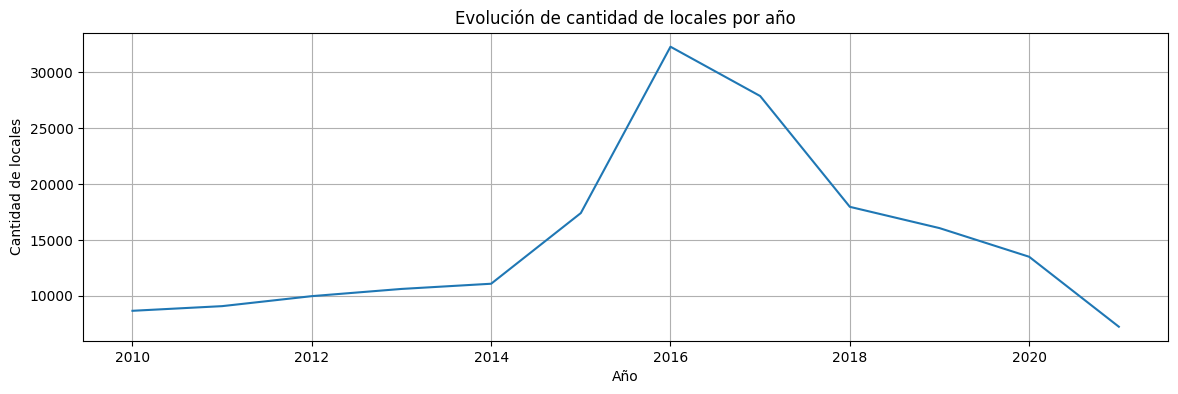

In [63]:
rest_evolution = dfgy_rest.groupby(['year']).agg({'site_id': 'count'}).reset_index()
rest_evolution = rest_evolution.loc[(rest_evolution['year'] >= 2010) & (rest_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_evolution, x='year', y='site_id')
plt.title('Evolución de cantidad de locales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de locales')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de locales registrados en yelp y google a lo largo del tiempo, medido en años
* Se observan claramente las fases de:
    * Nacimiento, en 2010
    * Evolución y desarrollo, entre 2012 y 2014
    * Posicionamiento y estabilización en el mercado, entre 2015 y 2019 
    * Involución, en 2020 -- esto último causado por el covid19

## Análisis de performance de restaurantes

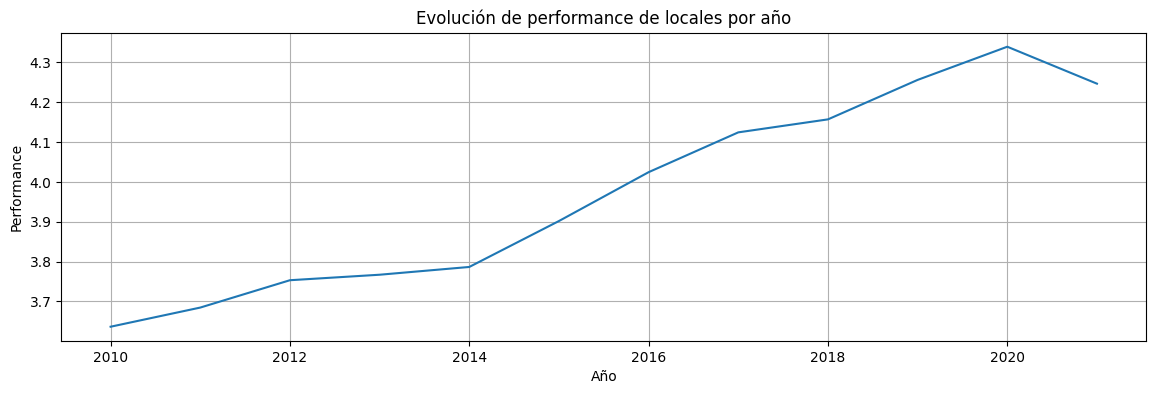

In [64]:
rest_performance = dfgy_rest.groupby(['year']).agg({'rating_avg': 'mean'}).reset_index()
rest_performance = rest_performance.loc[(rest_performance['year'] >= 2010) & (rest_performance['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_performance, x='year', y='rating_avg')
plt.title('Evolución de performance de locales por año')
plt.xlabel('Año')
plt.ylabel('Performance')
plt.grid(True)

Conclusión:
* Se muestra el rating promedio a lo largo del tiempo de todos los locales registrados
* Se observa una clara tendencia a la mejora del rating, lo cual se traduce en el involucramiento de los oferentes para cuidar su clientela. 
* Esta tendencia tiene un alto impacto social, ya que contribuye a instalar la mentalidad de satisfacción del cliente

## Análisis de plantel de usuarios (clientes)

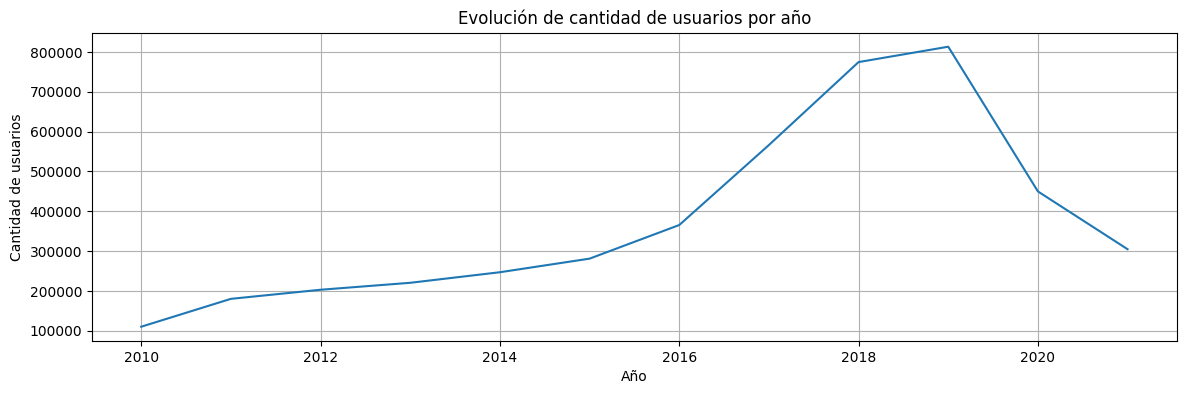

In [65]:
user_evolution = dfgy_user.groupby(['year']).agg({'user_id': 'count'}).reset_index()
user_evolution = user_evolution.loc[(user_evolution['year'] >= 2010) & (user_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=user_evolution, x='year', y='user_id')
plt.title('Evolución de cantidad de usuarios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)

Conclusión:
* Se muestran a lo largo del tiempo, la cantidad de usuarios registrados en yelp y google
* Se observa una clara tendencia de aumento de usuarios
* Se observa una clara disminución a partir de 2019, esto último causado por el fenómeno de covid19

## Análisis de demanda

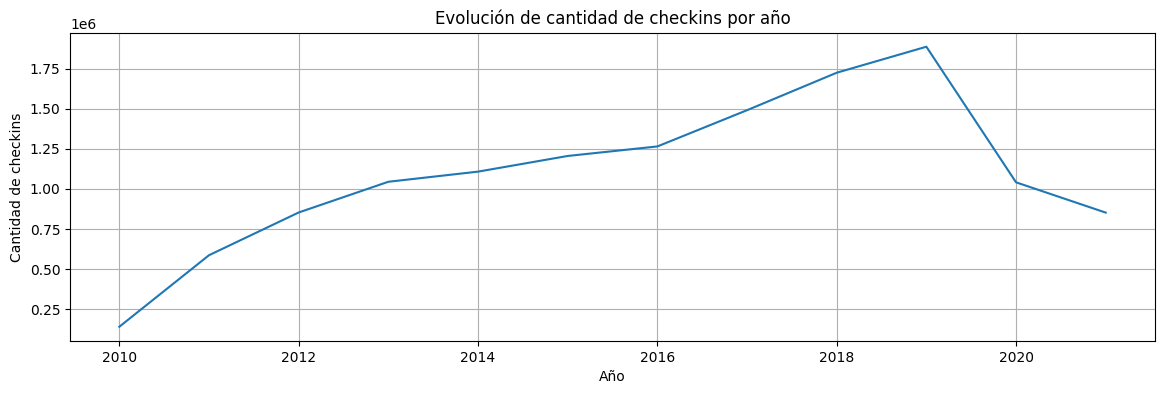

In [66]:
checkins_evolution = dfgy_checkins.groupby(['year']).agg({'datetime': 'count'}).reset_index()
checkins_evolution = checkins_evolution.loc[(checkins_evolution['year'] >= 2010) & (checkins_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=checkins_evolution, x='year', y='datetime')
plt.title('Evolución de cantidad de checkins por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de checkins')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de check-ins registrados en yelp a lo largo del tiempo, medido en años
* La baja de actividad a partir del 2015 puede deberse a la fuerte entrada del mercado de delivery

## Análisis de preferencias de usuario

### Categorías top

In [67]:
dfgy_categories_food_edited = pd.read_csv('dataset_gy_categories_food_edited.csv')
dfgy_categories_food_edited

,Id,source,categories,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,1,yelp,Restaurants,general,Restaurants,Restaurants,restaurants,restaurant
1,2,yelp,Food,general,Food,Food,food,food
2,3,yelp,Burgers,burger,Burgers,Burgers,burgers,burgers
3,4,yelp,Fast Food,fast food,Fast Food,Fast Food,fast food,fast food
4,5,yelp,Sandwiches,burger,Sandwiches,Sandwiches,sandwiches,sandwiches
...,...,...,...,...,...,...,...,...
444,445,google,Yakiniku restaurant,regional,Yakiniku,Yakiniku,yakiniku,yakiniku
445,446,google,Yakisoba Restaurant,regional,Yakisoba,Yakisoba,yakisoba,yakisoba
446,447,google,Yakitori restaurant,regional,Yakitori,Yakitori,yakitori,yakitori
447,448,google,Yemenite restaurant,regional,Yemenite,Yemenite,yemenite,yemenite


In [68]:
dfgy_categories_final = pd.merge(dfgy_categories, dfgy_categories_food_edited, on='categories')
dfgy_categories_final

,source_x,site_id,categories,Id,source_y,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,yelp,MTSW4McQd7CbVtyjqoe9mw,Food,2,yelp,general,Food,Food,food,food
1,yelp,mWMc6_wTdE0EUBKIGXDVfA,Food,2,yelp,general,Food,Food,food,food
2,yelp,CF33F8-E6oudUQ46HnavjQ,Food,2,yelp,general,Food,Food,food,food
3,yelp,bBDDEgkFA1Otx9Lfe7BZUQ,Food,2,yelp,general,Food,Food,food,food
4,yelp,eEOYSgkmpB90uNA7lDOMRA,Food,2,yelp,general,Food,Food,food,food
...,...,...,...,...,...,...,...,...,...,...
547859,google,0x80ec1fd3d42c9afb:0x90a7b30788182fc4,Sfiha restaurant,373,google,regional,Sfiha,Sfiha,sfiha,sfiha
547860,google,0x87e4f11cdb194ced:0x9f69c8ed25a28eb2,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
547861,google,0x89c2f9331071005d:0x308aad6c8c05becd,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
547862,google,0x80deaa0b093ecaa5:0xca75dfda7eacf203,Steamboat restaurant,398,google,regional,Steamboat,Steamboat,steamboat,steamboat


Text(0, 0.5, 'SUPRA-Categoría')

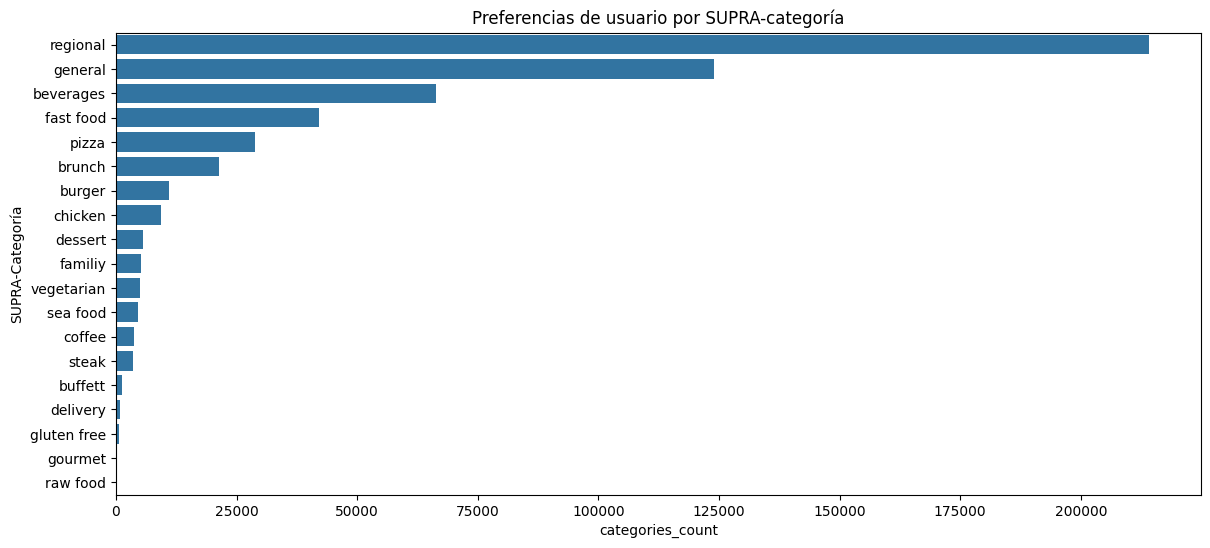

In [69]:
dfgy_categories_count = dfgy_categories_final.groupby('supracategory')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="supracategory", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por SUPRA-categoría')
plt.ylabel('SUPRA-Categoría')

Conclusión:
* Se muestran las "supra-categorías" más buscadas
* La característica denominada "supra-categoría" se ha incorporado en el modelo para ahondar en el conocimiento del usuario
* Se observa que la supra-categoría de "beverages" que contiene bares y pubs, contiene a un tipo de producto que puede ser de interés para los clientes

Text(0, 0.5, 'Categoría')

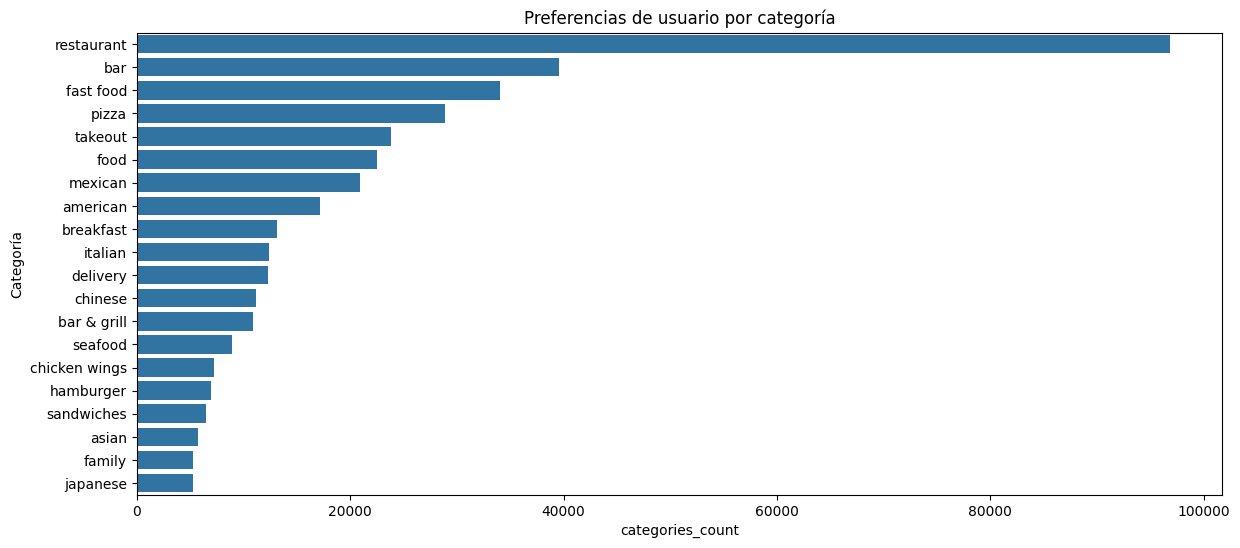

In [70]:
dfgy_categories_count = dfgy_categories_final.groupby('category_edited4')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="category_edited4", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por categoría')
plt.ylabel('Categoría')

### Atributos top

Text(0, 0.5, 'Atributos')

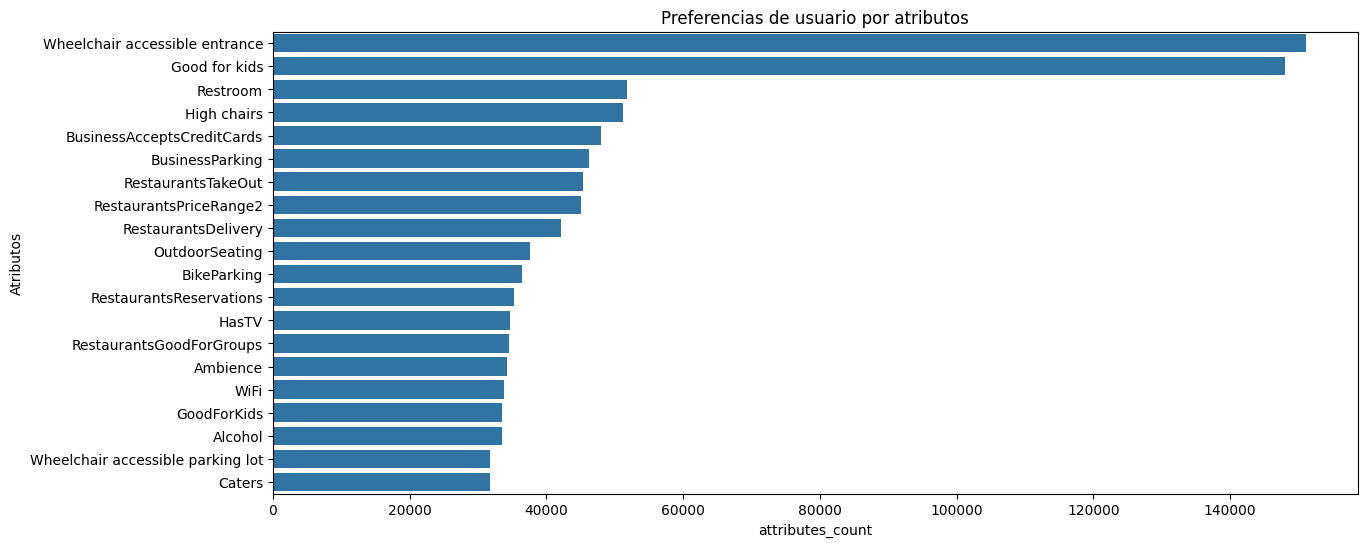

In [71]:
dfgy_attributes_count = dfgy_attributes.groupby('attributes')['site_id'].count().reset_index()
dfgy_attributes_count.rename(columns={'site_id': 'attributes_count'}, inplace=True)
dfgy_attributes_count.sort_values('attributes_count', ascending=False, inplace=True)
dfgy_attributes_count


plt.figure(figsize=(14, 6))
sns.barplot(x="attributes_count", y="attributes", data=dfgy_attributes_count.head(20))
plt.title('Preferencias de usuario por atributos')
plt.ylabel('Atributos')

Conclusión:
* Se observan los atributos más valorados por el mercado de USA
* El atributo líder es el que facilita el pago con tarjetas de crédito
* Resulta de gran interés para la clientela que el establecimiento cuente con parking

### Marcas top

In [72]:
dfgy_names_top = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'name']], how='left', on='site_id')
dfgy_names_top = dfgy_names_top.groupby('name')['site_id'].count().reset_index()

Text(0, 0.5, 'Marca')

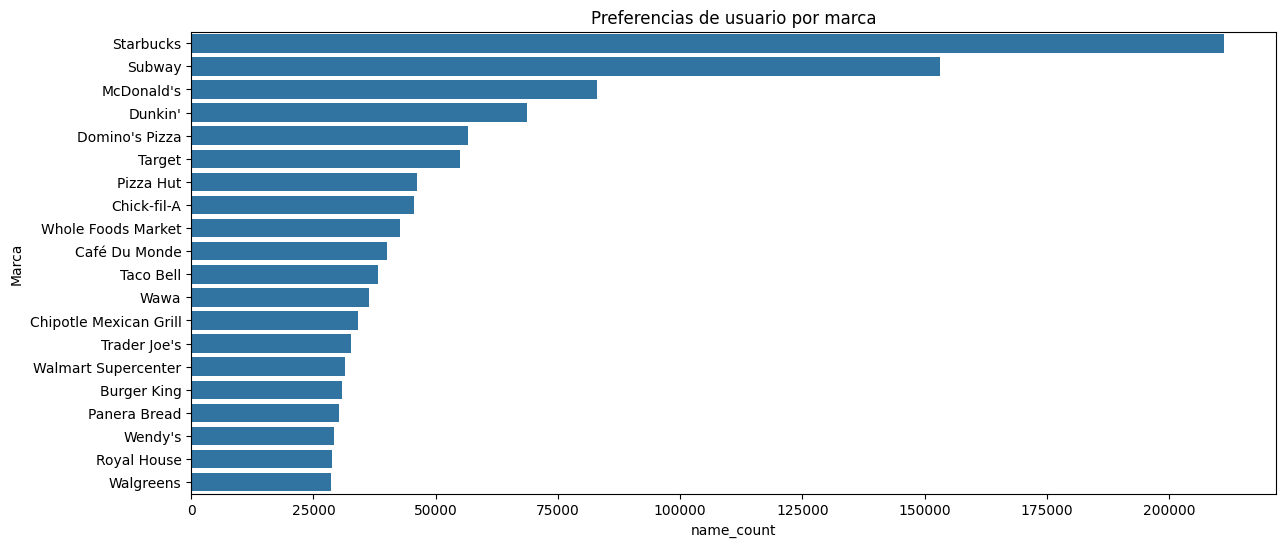

In [73]:
dfgy_names_top.rename(columns={'site_id': 'name_count'}, inplace=True)
dfgy_names_top = dfgy_names_top.sort_values('name_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="name_count", y="name", data=dfgy_names_top.head(20))
plt.title('Preferencias de usuario por marca')
plt.ylabel('Marca')

Conclusiones:
* Las dos marcas líderes como "Reading Terminal Market" y "Datz" ofrecen no solamente una experiencia gastronómica, sino un espacio social y de distensión. "Reading Terminal Market" es un espacio de paseo de compras y adyacentemente cuenta con un mercado gastronómico. Esta variable debe tenerse dentro de los atributos considerados para un sistema de recomendación
* Las dos marcas que le siguen son cafeterías, y luego sigue una marca de comidas rápidas ("McDonalds), para continuar con otros mercados de comida que ofrecen paseos
* Lo notable de esto es que no hay ningún restaurante tradicional dentro de las primeras diez marcas 

### Locaciones top

In [74]:
checkin_locations = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'state_city_postalcode']], on='site_id', how='inner')

In [75]:
checkin_locations = checkin_locations.loc[(checkin_locations['year'] >= 2010) & (checkin_locations['year'] <= 2021)]

In [76]:
checkin_locations.sample(2)

,source,site_id,datetime,year,month,state_city_postalcode
7237400,yelp,naFGcne3L3jawX6dojSE4w,2020-03-08 22:35:36,2020,3,MO - St. Louis - 63104
2941992,yelp,JbxOWK2tMUkNmYPvjPBVoA,2019-03-05 23:25:02,2019,3,LA - New Orleans - 70130


In [77]:
locations_top = checkin_locations.groupby(['state_city_postalcode']).agg({'datetime':'count'})
locations_top.rename(columns={'datetime':'checkins_count'}, inplace=True)
locations_top = locations_top.reset_index()
locations_top = locations_top.sort_values(by='checkins_count', ascending=False)

locations_top.head(10)

,state_city_postalcode,checkins_count
36925,LA - New Orleans - 70130,455589
81415,PA - Philadelphia - 19107,277818
10094,CA - Santa Barbara - 93101,233267
36912,LA - New Orleans - 70116,212483
87035,TN - Nashville - 37203,171068
81412,PA - Philadelphia - 19103,169875
81450,PA - Philadelphia - 19147,157774
36911,LA - New Orleans - 70115,130476
62024,NV - Reno - 89502,120782
31966,IN - Indianapolis - 46204,107256


Text(0, 0.5, 'Locación')

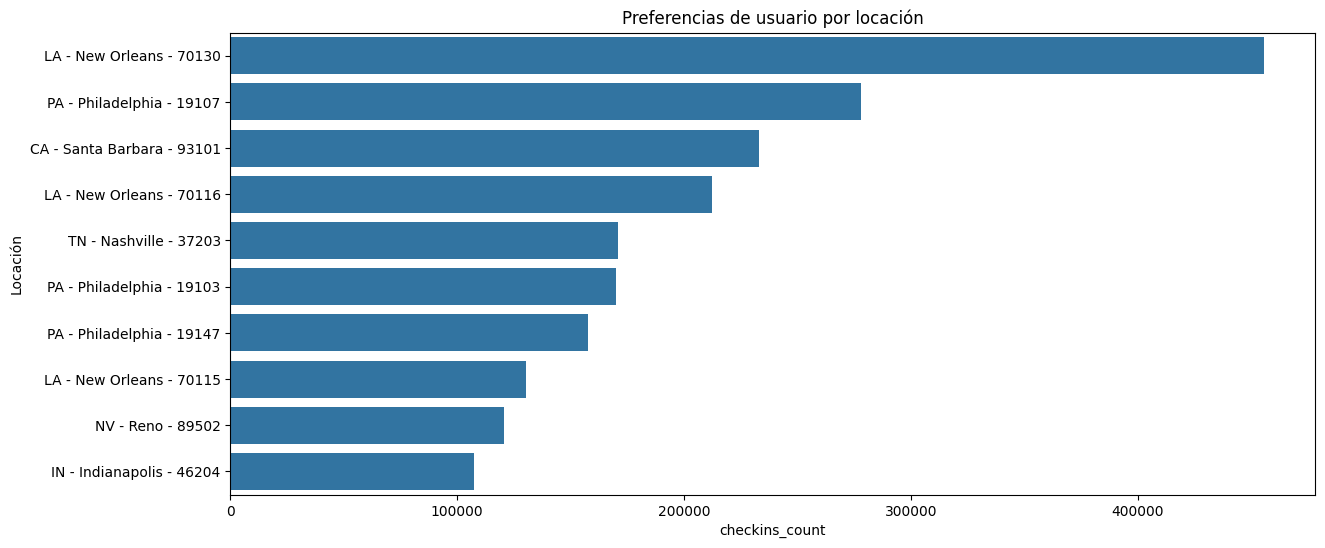

In [78]:
plt.figure(figsize=(14, 6))
sns.barplot(x="checkins_count", y="state_city_postalcode", data=locations_top.head(10))
plt.title('Preferencias de usuario por locación')
plt.ylabel('Locación')

Conclusiones:
* El gráfico de barras horizontales muestra la cantidad acumulada de check-ins, por locación (Estado - Ciudad - Código postal)
* Las locaciones líderes se encuentran en las ciudades de Philadelphia, New Orleans y Santa Barbara

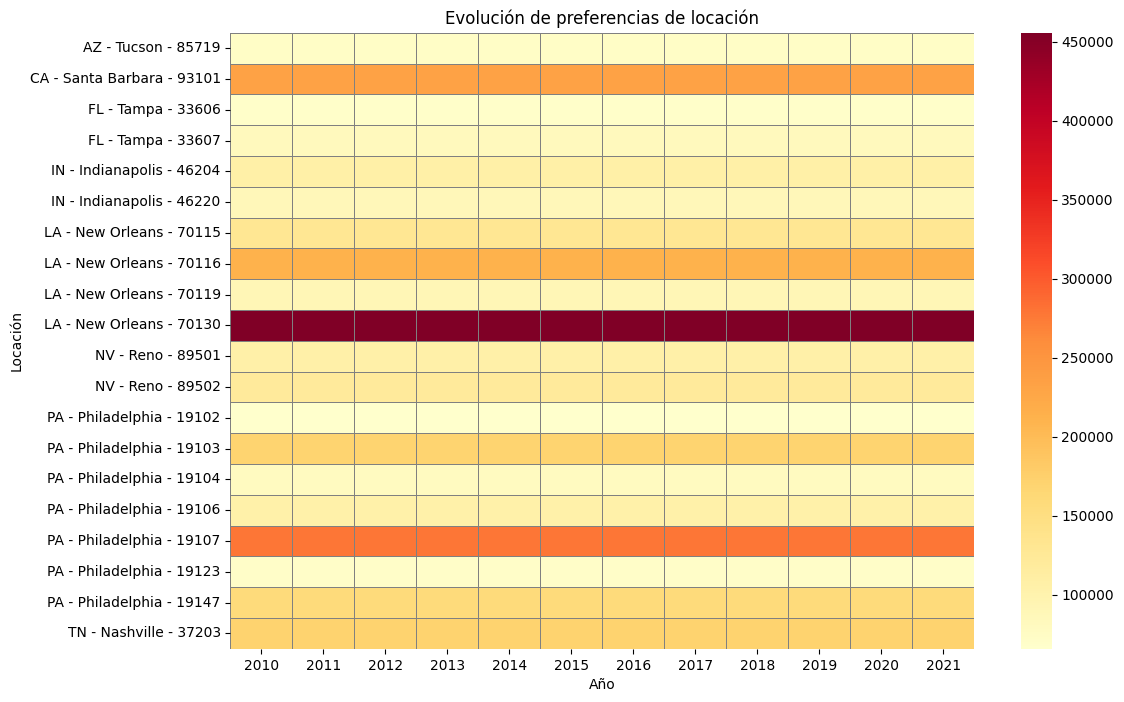

In [79]:
locations_top10 = locations_top.head(20)
locations_top_evol = pd.merge(checkin_locations, locations_top10, on='state_city_postalcode')
locations_top_evol_map = locations_top_evol.pivot_table(index='state_city_postalcode', columns='year', values='checkins_count', aggfunc='max')

plt.figure(figsize=(12, 8))
sns.heatmap(locations_top_evol_map, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Evolución de preferencias de locación')
plt.xlabel('Año')
plt.ylabel('Locación')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de los check-ins, por locación
* Se muestran las 20 locaciones más visitadas
* Las ciudades de Philadelphia, New Orleans y Santa Bárbara lideran el podio en diversos sitios

## Análisis de participación del usuario

### Involucramiento

In [80]:
customer_engagement = dfgy_reviews.groupby(['year']).agg({'datetime':'nunique', 'user_id':'nunique', 'site_id':'nunique'}).reset_index()
customer_engagement.rename(columns={'datetime':'reviews_count', 'user_id':'users_count', 'site_id':'sites_count'}, inplace=True)
customer_engagement['reviews_per_user'] = customer_engagement['reviews_count'] / customer_engagement['users_count']
customer_engagement['reviews_per_site'] = customer_engagement['reviews_count'] / customer_engagement['sites_count']

customer_engagement = customer_engagement.loc[(customer_engagement['year'] >= 2010) & (customer_engagement['year'] <= 2021)]
customer_engagement['year'] = customer_engagement['year'].astype(int)

customer_engagement

,year,reviews_count,users_count,sites_count,reviews_per_user,reviews_per_site
8,2010,20627,12087,8892,1.706544,2.319726
9,2011,36781,22105,14868,1.663922,2.473836
10,2012,47374,30459,20147,1.555337,2.351417
11,2013,64513,42954,25244,1.501909,2.555578
12,2014,85133,60275,30285,1.412410,2.811062
13,2015,131421,96712,45792,1.358890,2.869955
14,2016,300939,224901,80914,1.338095,3.719245
15,2017,666497,526146,107830,1.266753,6.180998
16,2018,1037783,828240,119870,1.252998,8.657571
17,2019,1284198,998926,125015,1.285579,10.272351


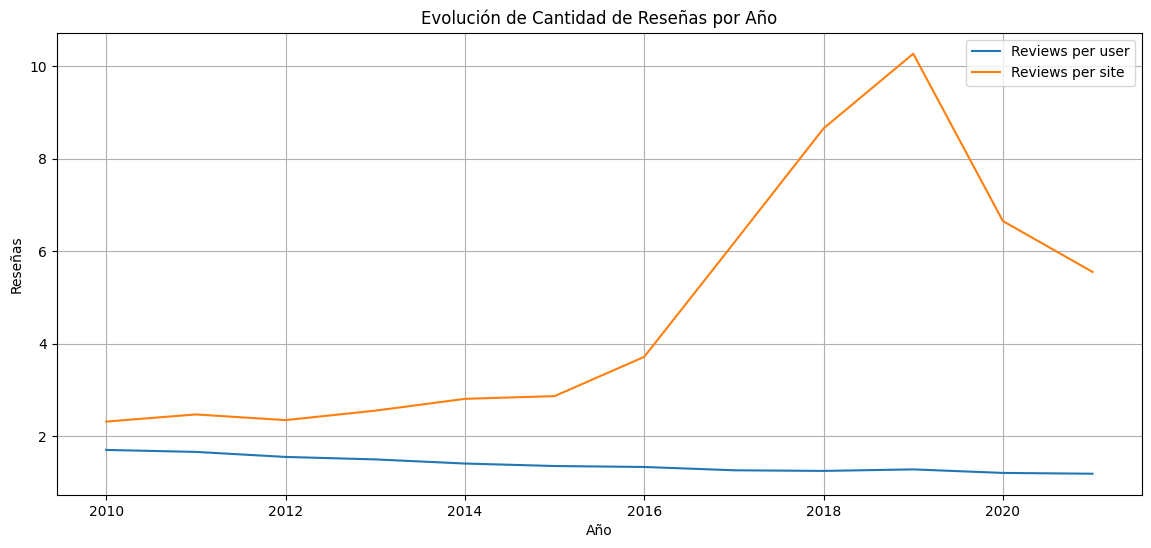

In [81]:
plt.figure(figsize=(14, 6))

sns.lineplot(customer_engagement, x='year', y='reviews_per_user', label='Reviews per user')
sns.lineplot(customer_engagement, x='year', y='reviews_per_site', label='Reviews per site')

plt.title('Evolución de Cantidad de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Reseñas')
plt.legend()
plt.grid(True)

plt.show()

Conclusión:
* Se muestran los promedios de reseñas por usuario y por local, respectivamente
* Se observa una leve tendencia a disminuir la cantidad de reseñas promedio por usuario
* Se obswerva una amplica tendencia a recibir más reseñas por local

### Satisfacción

In [82]:
customer_satisfaction = dfgy_reviews.groupby(['year']).agg({'rating':'mean', 'polarity':'mean'}).reset_index()
customer_satisfaction = customer_satisfaction.loc[(customer_satisfaction['year'] >= 2010) & (customer_satisfaction['year'] <= 2021)]

customer_satisfaction

,year,rating,polarity
8,2010,3.734976,0.731821
9,2011,3.731350,0.697699
10,2012,3.762938,0.683471
11,2013,3.758628,0.676473
12,2014,3.784720,0.664070
13,2015,3.816212,0.622458
14,2016,3.967301,0.564790
15,2017,4.102170,0.546677
16,2018,4.156971,0.547505
17,2019,4.201548,0.549258


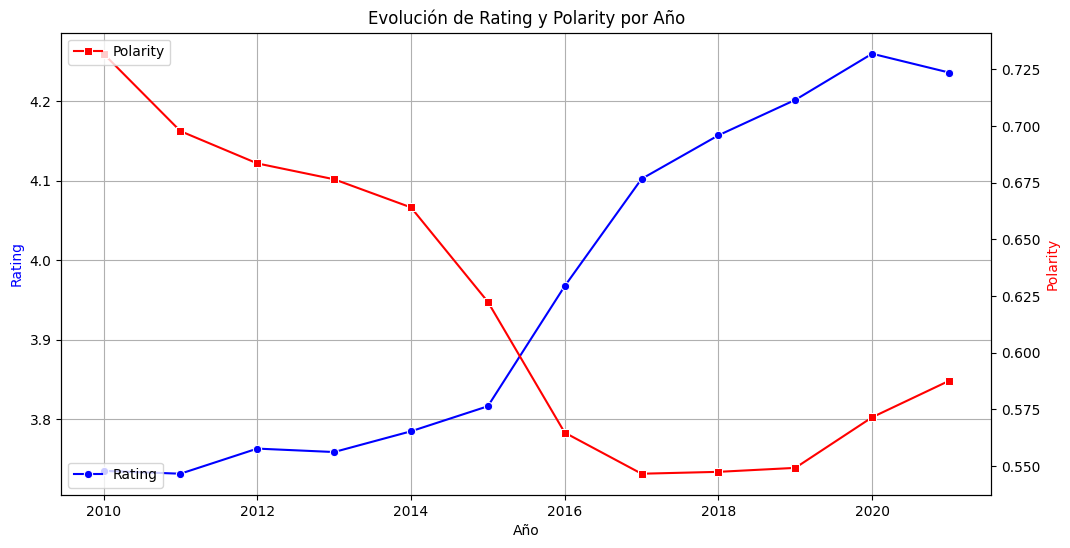

In [83]:
plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(data=customer_satisfaction, x='year', y='rating', color='blue', marker='o', label='Rating')

plt.xlabel('Año')
ax1.set_ylabel('Rating', color='blue')
plt.title('Evolución de Rating y Polarity por Año')
plt.grid(True)

ax2 = ax1.twinx()
sns.lineplot(data=customer_satisfaction, x='year', y='polarity', color='red', marker='s', label='Polarity', ax=ax2)
ax2.set_ylabel('Polarity', color='red')

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.show()

Concllusión:
* Se muestra la evolución anual de promedios de rating y polaridad del análisis de sentimientos preliminar
* SE observa claramente la mejora de la satisfacción del cliente a lo largo del tiempo
* Se observa una disminución e inicio de estabilización de la polaridad, lo cual es un indicador de una participación activa y proactiva del usuario en las reseñas

# Conclusiones
====================================================================================================================================

## FASE DE ETL (EXTRACTION, TRANSFORMATION AND LOAD OF DATA)

Debido a la gran cantidad de información y necesidad de procesamiento, la fase de ETL se realizó en cinco archivos diferentes:
* DS_PjFinal_yelp1_sites_checkins_users
* DS_PjFinal_yelp2_reviews
* DS_PjFinal_google1_sites
* DS_PjFinal_google2_reviews
* DS_PjFinal_ETL_SitesUniques

### Diagrama simple de estructura de datos

<div style="text-align:center;">
    <img src="/Users/Juan/Documents/Academics/DataScience/PjFinal/DataStructureSimple.png" alt="Texto alternativo" width="1000" height="1000">
</div>

### Diagrama completo de estructura de datos

<div style="text-align:center;">
    <img src="/Users/Juan/Documents/Academics/DataScience/PjFinal/DataStructureComplete.png" alt="Texto alternativo" width="1000" height="1000">
</div>

## FASE DE EDA (EXPLORATORY DATA ANALYSIS) 

El EDA se ha basado en el análisis de oferta y demanda del dataset conjunto de Yelp y Google, así como el análisis de preferencias de usuarios, en función de conocer los primeros datos del mercado y buscar oportunidades y soluciones para propuesta del modelo de machine learning a presentar como prooducto final.

### FASE DE PRE-PROCESAMIENTO DE DATOS

El pre-procesamiento de datos consistió en las siguientes tareas:
* Gestión de tipos de datos
* Gestión de valores nulos
* Gestión de valores duplicados
* Gestión de características: eliminación de campos innecesarios y agregado de campos auxiliares 

Observaciones respecto al pre-procesamiento de datos:
* Se ha utilizado un dataset de códigos postales para corregir el dataset original de "business", ya que se detectó un error en el dataset original. 
* No se encontraron grandes cantidades de valores nulos, y no se encontraron duplicados que afecten a los datos. 
* Se modificaron algunos tipos de datos, sobre todo de aquellos campos de valor tipo "fecha"
* Se agregaron algunas características o campos auxiliares para facilitar el posterior agrupamiento y visualización de datos
* En particular, las modificaciones específicas que se han realizado son las siguientes:
    * Corrección de zip codes
    * Creación de precios en 
    * Creación de campo de "supracategorías" para agrupamiento de categorías de comida
    * Creación de listado único de restaurantes, combinando listado de ambas fuentes (Yelp y Google)

### FASE DE ANALISIS DE DATOS

Respecto al análisis de datos, se ha considerado estudiar el mercado a través de la oferta y demanda, y las preferencias del usuario. 
* Para valorizar la oferta, se ha considerado la cantidad de locales registrados en yelp
* Para valorizar la demanda, se ha considerado la cantidad de check-ins registrados
* Para conocer las preferencias del usuario, se consideran también los check-ins agrupados por categorías, marcas y locaciones

### CONSIDERACIONES PARA EL PRODUCTO FINAL

El interés específico de este análisis deviene en la definición de inputs y outputs a considerar en el modelo de Machine Learning, para luego definir los KPIs del proyecto, dashboard y producto final a presentar al cliente.

Inputs a considerar:
* Supra-categorías de comida
* Categorías de comida
* Atributos
* Marcas
* Locaciones (estado, ciudad y código postal)
* Precio

Outputs a considerar:
* Proyección de ventas
* Proyección de check-ins
* Proyección de cantidad de reseñas
* Proyección de valoracióin de reseñas
* Proyección de satisfacción del cliente
* Proyección de performance del site